# Classification of Daily Expenses<n>
Author: Maria Kasznar (https://www.linkedin.com/in/biakasznar/) <br>
Date: June 2025


***

This machine learning project implements a multiclass classification pipeline to automatically categorize personal expense data collected during a year-long stay in Australia (July 2022 - July 2023), leveraging labels from two distinct cities. The model is specifically designed for transferability and reusability, with a key focus on accurately classifying expenses from a third, previously unlabeled city.

While the core database has been translated into English for broader accessibility, the 'Description' column remains in Portuguese due to the complexity of automated translation for nuanced free-text entries. 

***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
pd.options.mode.chained_assignment = None

path = r'C:\Users\biaka\OneDrive\Documents\JupyterNotebooks\ExpensesClassification\data'
file_name = r'DailyExpenses_PythonProject.xlsx'

df = pd.read_excel(os.path.join(path, file_name))

In [2]:
list(df.columns)

['Date',
 'Cash Flow',
 'Description',
 'Category',
 'City',
 'Payer',
 'Mode of Payment',
 'Amount']

* **'Cash Flow'**: "C" for Credit (income), "D" for Debit (expense). Only expenses will be considered in this project, meaning the dataset will be filtered to include only "D" transactions.
* **'Description'**: A free-text field providing specific details about the transaction (Note: This column is in Portuguese, as previously discussed).
* **'Category'**: The classification or type of the expense (e.g., Food, Transport, Rent), serving as the target variable for your multiclass classification model.
* **'City'**: The geographical location where the transaction took place. For this project, __data from Brisbane and Perth is labeled__, while data from __Jabiru is the target__ for classification by the trained model.

The remaining columns, i.e. Date, Payer, Mode of Payment, and Amount, have straightforward names clearly indicating their respective data points.

#### Data Cleaning

In [3]:
df_expenses = df[df['Cash Flow'] == 'D']

In [4]:
df_jabiru = df_expenses[df_expenses['City'] == 'Jabiru']
df_expenses.drop(df_expenses[(df_expenses['City'] != 'Brisbane') & (df_expenses['City'] != 'Perth')].index, inplace=True)

In [5]:
df_expenses.shape

(564, 8)

In [6]:
df_expenses.describe()

,Date,Amount
count,564,564.000000
mean,2023-02-17 00:35:44.680850944,71.253333
min,2022-10-03 00:00:00,1.000000
25%,2022-12-17 00:00:00,10.000000
50%,2023-02-05 12:00:00,24.450000
75%,2023-04-08 06:00:00,44.100000
max,2023-07-13 00:00:00,4200.000000
std,NaN,266.601877


In [7]:
df_expenses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 564 entries, 82 to 872
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             564 non-null    datetime64[ns]
 1   Cash Flow        564 non-null    object        
 2   Description      564 non-null    object        
 3   Category         551 non-null    object        
 4   City             564 non-null    object        
 5   Payer            564 non-null    object        
 6   Mode of Payment  564 non-null    object        
 7   Amount           564 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 39.7+ KB


__Category has 13 missing values.__ <br>
All other columns seem okay.

In [8]:
df_expenses[df_expenses.Category.isnull()]

,Date,Cash Flow,Description,Category,City,Payer,Mode of Payment,Amount
215,2022-11-27,D,Saque - Carro,NaN,Brisbane,Bruno,NAB,2000.00
216,2022-11-27,D,Pagamento - Carro & Mecânico,NaN,Brisbane,Bruno,NAB,1550.00
217,2022-11-27,D,Saque - Carro,NaN,Brisbane,Bia,NAB,2000.00
226,2022-12-01,D,Saque - BQL,NaN,Brisbane,Bruno,NAB,250.00
231,2022-12-02,D,Transferência do carro,NaN,Brisbane,Bruno,Wise,60.80
247,2022-12-05,D,Transferência,NaN,Brisbane,Bia,NAB,969.06
323,2022-12-27,D,Rego,NaN,Brisbane,Bruno,NAB,399.20
481,2023-02-15,D,Saque - Revisão do carro,NaN,Brisbane,Bruno,NAB,120.00
541,2023-02-27,D,Troca de Pneus & Realinhamento,NaN,Brisbane,Bruno,NAB,529.00
544,2023-02-27,D,Transferência,NaN,Brisbane,Bruno,NAB,537.76


These expenses can be divided into 3 groups: withdrawals, transfers and occasional payments. None of them are part of the scope of the project.<br>Withdrawals and transfers are not expenses; they were recorded for track of cash flow.
*Occasional* expenses are not *daily*.<br>
Therefore, __all these rows will de deleted.__ 

In [9]:
df_expenses.dropna(subset = ['Category'], inplace=True)

In [10]:
#Unique values in relevant columns

for i in [3, 4, 5, 6]:
    print(df_expenses[list(df.columns)[i]].value_counts(), "\n\n")

Category
Restaurant                 193
Supermarket                103
Transport                   55
Gas                         50
Leisure Activity            44
Health Insurance            34
Misc                        27
Rent & Bills                19
Clothes                     11
Certificates & Licenses      6
Subscription                 6
-                            2
Trips                        1
Name: count, dtype: int64 


City
Brisbane    349
Perth       202
Name: count, dtype: int64 


Payer
Bruno    291
Bia      260
Name: count, dtype: int64 


Mode of Payment
NAB     497
Wise     54
Name: count, dtype: int64 




In [11]:
df_expenses[df_expenses.Category.isin(['-'])]

,Date,Cash Flow,Description,Category,City,Payer,Mode of Payment,Amount
82,2022-10-03,D,Passagens para Brisbane,-,Brisbane,Bruno,Wise,696.29
144,2022-11-09,D,Transferência,-,Brisbane,Bruno,NAB,1988.22


Once again, these rows fall under the undesired categories afore mentioned, and will be deleted.<br>
The first one is an occasional expense, while the second is a money transfer.<br>


In [12]:
df_expenses.drop(df_expenses[df_expenses.Category.isin(['-'])].index, inplace = True)

In [13]:
df_expenses.reset_index(drop=True, inplace=True)

In [14]:
df_expenses

,Date,Cash Flow,Description,Category,City,Payer,Mode of Payment,Amount
0,2022-10-19,D,Aluguel,Rent & Bills,Brisbane,Bia,NAB,2100.00
1,2022-11-08,D,Woolworths,Supermarket,Brisbane,Bruno,Wise,58.65
2,2022-11-08,D,Hungry Jack's,Restaurant,Brisbane,Bruno,Wise,20.85
3,2022-11-08,D,Go Card,Transport,Brisbane,Bruno,Wise,50.00
4,2022-11-08,D,Aluguel,Rent & Bills,Brisbane,Bia,NAB,4200.00
...,...,...,...,...,...,...,...,...
544,2023-07-09,D,Macca's Spearwood,Restaurant,Perth,Bia,NAB,2.00
545,2023-07-10,D,Bahn Mi Bibra Lake,Restaurant,Perth,Bruno,NAB,22.00
546,2023-07-10,D,Pack & Send,Misc,Perth,Bia,NAB,487.97
547,2023-07-13,D,Pagamento ATO,Misc,Perth,Bia,NAB,132.83


In [26]:
df_expenses.sort_values('Amount', ascending=False).head(10)

,Date,Cash Flow,Description,Category,City,Payer,Mode of Payment,Amount
4,2022-11-08,D,Aluguel,Rent & Bills,Brisbane,Bia,NAB,4200.00
0,2022-10-19,D,Aluguel,Rent & Bills,Brisbane,Bia,NAB,2100.00
546,2023-07-10,D,Pack & Send,Misc,Perth,Bia,NAB,487.97
497,2023-06-13,D,Aluguel,Rent & Bills,Perth,Bruno,NAB,300.00
350,2023-03-14,D,Aluguel,Rent & Bills,Perth,Bruno,NAB,300.00
367,2023-03-21,D,Aluguel,Rent & Bills,Perth,Bruno,NAB,300.00
380,2023-03-28,D,Aluguel,Rent & Bills,Perth,Bruno,NAB,300.00
413,2023-04-11,D,Aluguel,Rent & Bills,Perth,Bruno,NAB,300.00
421,2023-04-18,D,Aluguel,Rent & Bills,Perth,Bruno,NAB,300.00
433,2023-04-25,D,Aluguel,Rent & Bills,Perth,Bruno,NAB,300.00


In [195]:
df_expenses[df_expenses['Valor']>500]

,Data,E/S,O quê?,Variável,Cidade,Quem pagou/recebeu?,Como pagou/recebeu?,Valor
0,2022-10-19,S,Aluguel,Aluguel + Contas,Brisbane,Bia,NAB,2100.0
4,2022-11-08,S,Aluguel,Aluguel + Contas,Brisbane,Bia,NAB,4200.0


### Exploratory Data Analysis (EDA):
Understand the dataset's overall structure and characteristics

<Axes: title={'center': 'Valor'}, xlabel='Variável'>

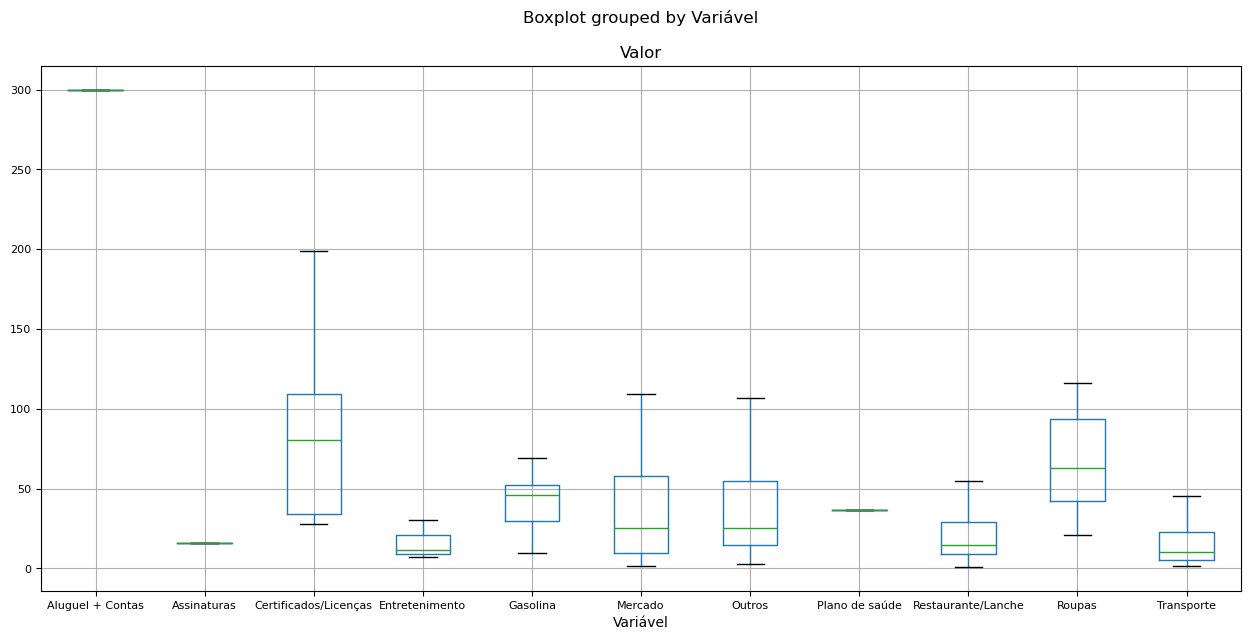

In [196]:
fig, ax = plt.subplots(figsize=(15, 7))
df_expenses.boxplot(column='Valor', by='Variável', ax=ax, showfliers = False, fontsize=8)

<Axes: title={'center': 'Valor'}, xlabel='Quem pagou/recebeu?'>

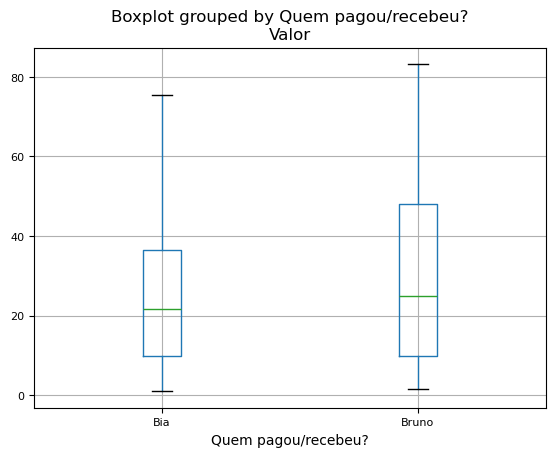

In [197]:
df_expenses.boxplot(column='Valor', by='Quem pagou/recebeu?', showfliers = False, fontsize=8)

<Axes: title={'center': 'Valor'}, xlabel='Como pagou/recebeu?'>

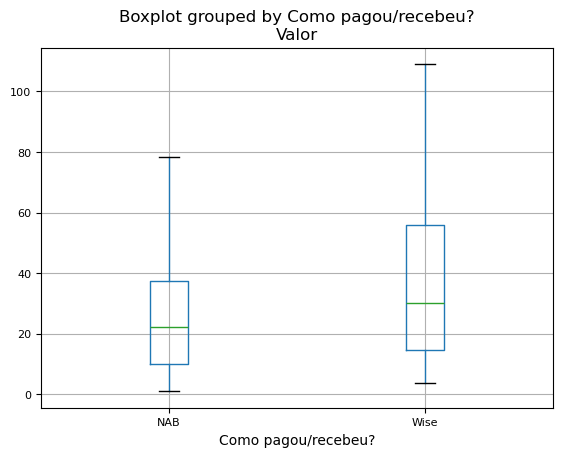

In [198]:
df_expenses.boxplot(column='Valor', by='Como pagou/recebeu?', showfliers = False, fontsize=8)

<Axes: >

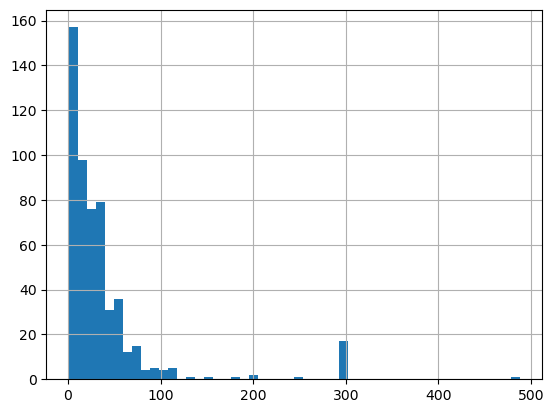

In [199]:
df_expenses[df_expenses['Valor']<=1000]['Valor'].hist(bins=50)

In [200]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_expenses, test_size=0.3, random_state=42)

In [201]:
train_set

,Data,E/S,O quê?,Variável,Cidade,Quem pagou/recebeu?,Como pagou/recebeu?,Valor
316,2023-02-22,S,Bupa,Plano de saúde,Brisbane,Bruno,NAB,36.53
154,2022-12-26,S,Krispy Kreme,Restaurante/Lanche,Brisbane,Bruno,NAB,15.35
126,2022-12-16,S,Kare Chicken - Chapter 3,Restaurante/Lanche,Brisbane,Bia,NAB,13.40
360,2023-03-18,S,Gozleme Freemantle,Restaurante/Lanche,Perth,Bia,NAB,15.25
535,2023-07-05,S,Coles - cookies pro Bruno Urrando de Fome,Mercado,Perth,Bia,NAB,3.50
...,...,...,...,...,...,...,...,...
71,2022-11-28,S,Pedágio - CarNextDoor,Transporte,Brisbane,Bruno,NAB,6.56
106,2022-12-10,S,SushiHub,Restaurante/Lanche,Brisbane,Bruno,NAB,23.20
270,2023-02-05,S,Gasolina Shell,Gasolina,Brisbane,Bruno,NAB,47.01
435,2023-04-29,S,Pizzaria Mack Daddy's,Restaurante/Lanche,Perth,Bruno,NAB,36.61


In [202]:
test_set

,Data,E/S,O quê?,Variável,Cidade,Quem pagou/recebeu?,Como pagou/recebeu?,Valor
247,2023-01-27,S,GoCard,Transporte,Brisbane,Bruno,Wise,10.00
78,2022-12-01,S,Gasolina bp,Gasolina,Brisbane,Bruno,NAB,53.32
245,2023-01-27,S,SushiHub,Restaurante/Lanche,Brisbane,Bruno,NAB,7.10
353,2023-03-15,S,Hare Krishna,Restaurante/Lanche,Perth,Bia,NAB,14.00
477,2023-05-30,S,Gasolina Caltex,Gasolina,Perth,Bruno,NAB,47.04
...,...,...,...,...,...,...,...,...
42,2022-11-20,S,Aluguel Car Next Door,Transporte,Brisbane,Bruno,NAB,244.99
357,2023-03-17,S,Coles,Mercado,Perth,Bia,NAB,8.00
182,2023-01-04,S,Kmart,Outros,Brisbane,Bruno,NAB,11.50
174,2023-01-01,S,Cricket - 2 ingressos,Entretenimento,Brisbane,Bruno,Wise,50.30


In [203]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train_set['O quê?'])

In [204]:
vectorizer.vocabulary_

{'bupa': 41,
 'krispy': 158,
 'kreme': 157,
 'kare': 149,
 'chicken': 60,
 'chapter': 57,
 'gozleme': 130,
 'freemantle': 115,
 'coles': 70,
 'cookies': 75,
 'pro': 227,
 'bruno': 40,
 'urrando': 291,
 'de': 86,
 'fome': 109,
 'national': 197,
 'crime': 80,
 'check': 59,
 'gelato': 125,
 'messina': 183,
 'bp': 37,
 'beeliar': 24,
 'woolies': 301,
 'united': 290,
 'metro': 185,
 'vault': 294,
 'games': 121,
 'toast': 281,
 'face': 106,
 'grillah': 133,
 'red': 231,
 'rooster': 239,
 'aldi': 6,
 'car': 52,
 'park': 213,
 'mcdonald': 177,
 'sobremesas': 254,
 'sushihub': 273,
 'gasolina': 123,
 'reembolsável': 234,
 'aluguel': 9,
 'sushi': 271,
 'roll': 237,
 'fortitude': 113,
 'valley': 292,
 'puma': 228,
 'spar': 257,
 'morningside': 190,
 'grill': 132,
 'curry': 81,
 'gateway': 124,
 'the': 279,
 'coffee': 69,
 'connect': 73,
 'go': 127,
 'card': 53,
 'almoço': 8,
 'indiano': 144,
 'boost': 35,
 'hummingbird': 138,
 'café': 47,
 'mandurah': 174,
 'starbucks': 260,
 'curso': 82,
 'baris

In [205]:
train_set

,Data,E/S,O quê?,Variável,Cidade,Quem pagou/recebeu?,Como pagou/recebeu?,Valor
316,2023-02-22,S,Bupa,Plano de saúde,Brisbane,Bruno,NAB,36.53
154,2022-12-26,S,Krispy Kreme,Restaurante/Lanche,Brisbane,Bruno,NAB,15.35
126,2022-12-16,S,Kare Chicken - Chapter 3,Restaurante/Lanche,Brisbane,Bia,NAB,13.40
360,2023-03-18,S,Gozleme Freemantle,Restaurante/Lanche,Perth,Bia,NAB,15.25
535,2023-07-05,S,Coles - cookies pro Bruno Urrando de Fome,Mercado,Perth,Bia,NAB,3.50
...,...,...,...,...,...,...,...,...
71,2022-11-28,S,Pedágio - CarNextDoor,Transporte,Brisbane,Bruno,NAB,6.56
106,2022-12-10,S,SushiHub,Restaurante/Lanche,Brisbane,Bruno,NAB,23.20
270,2023-02-05,S,Gasolina Shell,Gasolina,Brisbane,Bruno,NAB,47.01
435,2023-04-29,S,Pizzaria Mack Daddy's,Restaurante/Lanche,Perth,Bruno,NAB,36.61


In [206]:
X_full = train_set.copy()

X_full['day_of_week'] = X_full['Data'].dt.dayofweek
X_full['weekday'] = np.where(X_full['day_of_week'] < 5, 1, 0)

drop_columns = ['E/S', 'Data', 'Cidade']
X_full.drop(drop_columns, axis=1, inplace=True)

In [207]:
y_train = X_full['Variável']
y_train = y_train.values.reshape(-1,1)

X_train = X_full.drop('Variável', axis=1)

In [208]:
from sklearn.preprocessing import OrdinalEncoder

oe_target = OrdinalEncoder()
y_train = oe_target.fit_transform(y_train)

In [209]:
y_train = pd.DataFrame(y_train, columns=['Variável'])

In [210]:
Xt_full = test_set.copy()

Xt_full['day_of_week'] = Xt_full['Data'].dt.dayofweek
Xt_full['weekday'] = np.where(Xt_full['day_of_week'] < 5, 1, 0)

Xt_full.drop(drop_columns, axis=1, inplace=True)

y_test = Xt_full['Variável']
y_test = y_test.values.reshape(-1,1)
X_test = Xt_full.drop('Variável', axis=1)

In [211]:
y_test = oe_target.transform(y_test)
y_test = pd.DataFrame(y_test, columns=['Variável'])

In [212]:
#Creating Pipeline

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import warnings

bin_cat_columns = ['Quem pagou/recebeu?', 'Como pagou/recebeu?']
multi_cat_columns = ['Variável']
free_text_columns = ['O quê?']
num_columns = ['Valor']

# PREPROCESSORS
bin_cat_pp = Pipeline([
    ('ordinal_enc', OrdinalEncoder())
])

multi_cat_pp = Pipeline([
    ('onehot', OneHotEncoder())
])


free_text_pp = Pipeline([
    ('tfidf', TfidfVectorizer())
])

num_pp = Pipeline([
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    [
        ('binary_categorical', bin_cat_pp, bin_cat_columns),
        ('free_text', free_text_pp, 'O quê?'),
        ('numerical', num_pp, num_columns)
    ]
)

In [213]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

dict_classifiers = {
    "DecisionTreeClassifier" : DecisionTreeClassifier(max_depth = 10, random_state=0),
    "SVC" : SVC(kernel = 'rbf', C = 5, random_state=0),
    "KNN" : KNeighborsClassifier(n_neighbors = 5),
    "GBC": GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, max_depth=3, random_state=0),
    "RandomForest": RandomForestClassifier(n_estimators=100, max_depth=8, random_state=0)
}

In [214]:
df_predictions = pd.DataFrame()
cm_dict = {}
micro_recall_dict = {}
macro_recall_dict = {}

In [215]:
warnings.filterwarnings("ignore")

for model, model_instantiation in dict_classifiers.items():
    
    pipeline = make_pipeline(preprocessor, model_instantiation)
    pipeline.fit(X_train, y_train)
    print('\033[1m' + 'Fitting ' + model + '\033[0m')
    predictions = pipeline.predict(X_test)
    df_predictions[model] = predictions 
    print('Making predictions for model', model)

    print(classification_report(y_test, predictions))
    
    cm = confusion_matrix(y_test, predictions)
    cm_dict.update({model:cm})
    print('Confusion matrix calculated')

    micro_recall = recall_score(y_test, predictions, average='micro')
    micro_recall_dict.update({model:micro_recall})
    
    macro_recall = recall_score(y_test, predictions, average='macro')
    macro_recall_dict.update({model:macro_recall})
    print('Micro and macro recall calculated')

Fitting DecisionTreeClassifier
Making predictions for model DecisionTreeClassifier
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      1.00      1.00         1
         2.0       0.00      0.00      0.00         1
         3.0       0.83      0.83      0.83        12
         4.0       0.88      0.78      0.82        18
         5.0       0.93      0.84      0.89        32
         6.0       0.00      0.00      0.00        10
         7.0       1.00      1.00      1.00        11
         8.0       0.64      0.92      0.75        50
         9.0       0.00      0.00      0.00         7
        10.0       0.69      0.50      0.58        18

    accuracy                           0.75       165
   macro avg       0.62      0.62      0.62       165
weighted avg       0.70      0.75      0.71       165

Confusion matrix calculated
Micro and macro recall calculated
Fitting SVC
Making predictions for model S

In [216]:
micro_recall_dict, macro_recall_dict

({'DecisionTreeClassifier': 0.7454545454545455,
  'SVC': 0.8848484848484849,
  'KNN': 0.7636363636363637,
  'GBC': 0.8727272727272727,
  'RandomForest': 0.7393939393939394},
 {'DecisionTreeClassifier': 0.6249873737373737,
  'SVC': 0.8287337662337663,
  'KNN': 0.6663131313131312,
  'GBC': 0.8341883116883118,
  'RandomForest': 0.5200378787878788})

In [217]:
micro_recall_dict.get('KNN')

0.7636363636363637

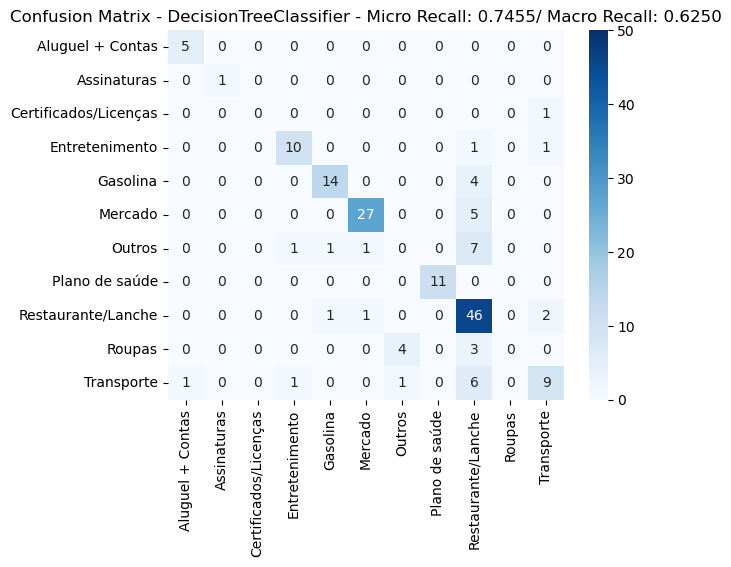

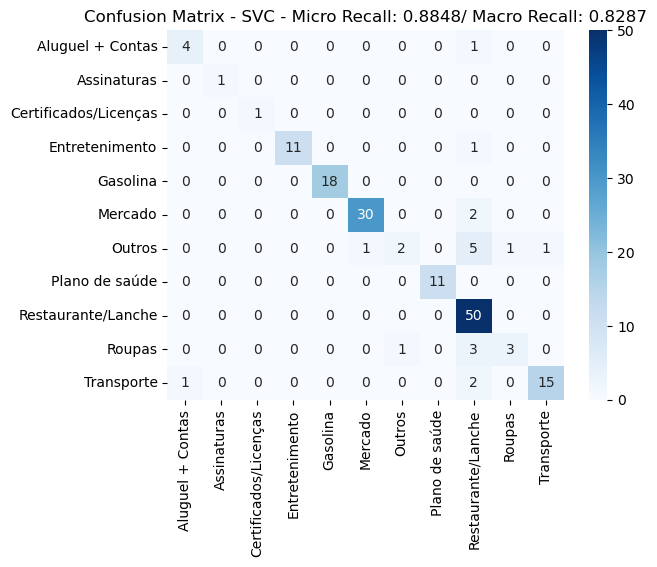

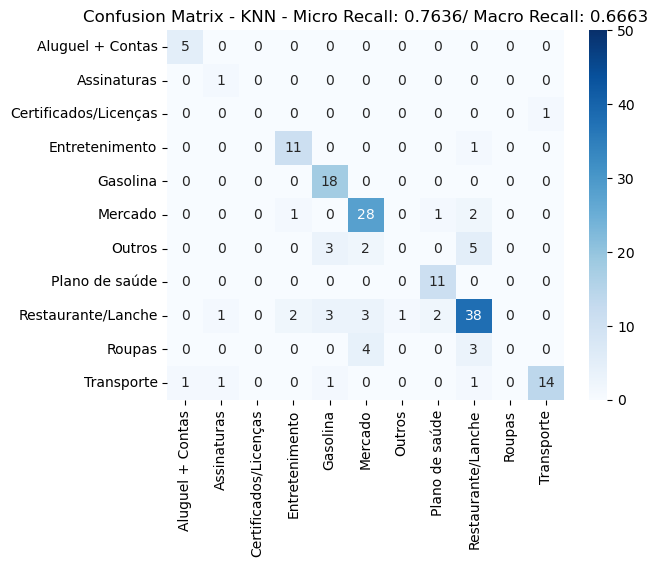

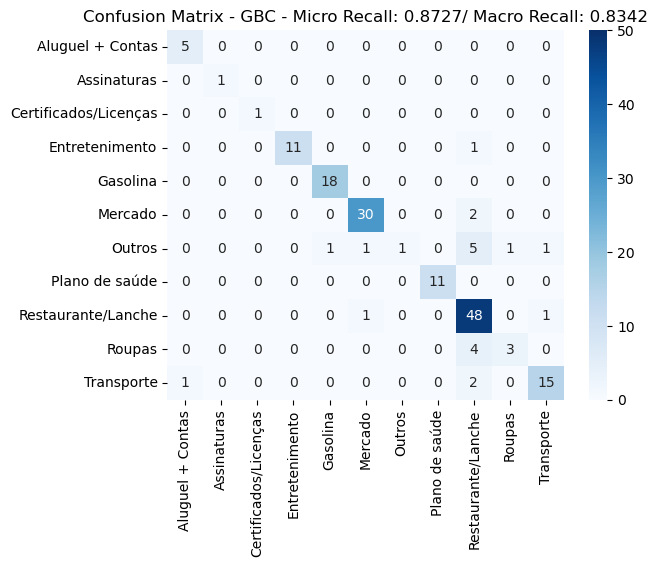

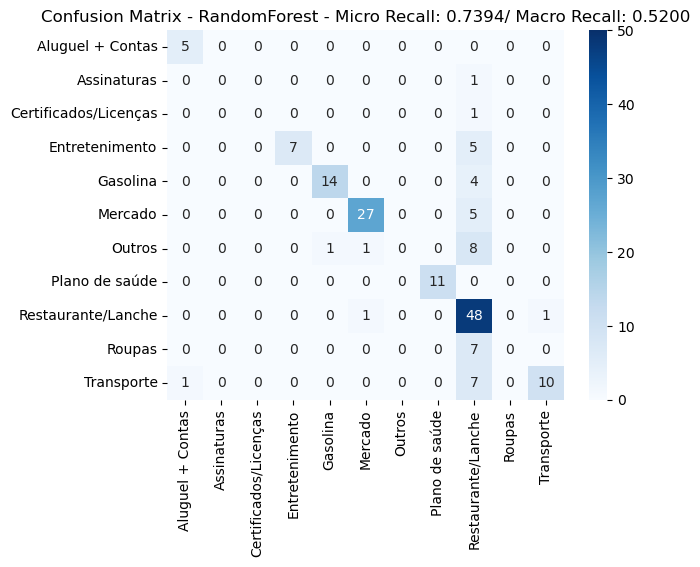

In [357]:
for model, cm in cm_dict.items():
    sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), vmax=50,
                xticklabels=oe_target.categories_[0], yticklabels=oe_target.categories_[0])
    micro = "{:.4f}".format(micro_recall_dict.get(model))
    macro = "{:.4f}".format(macro_recall_dict.get(model))
    plt.title("Confusion Matrix - " + model + ' - Micro Recall: ' + micro + '/ Macro Recall: ' + macro)
    plt.savefig(f"output_{model}.png", bbox_inches="tight")
    plt.show()

In [219]:
df_predictions.insert(0, 'Target', y_test)

In [220]:
all_correct = df_predictions[df_predictions.eq(df_predictions.iloc[:, 0], axis=0).all(axis=1)]

In [221]:
all_correct.shape[0] / df_predictions.shape[0]

0.6545454545454545

In [222]:
misclassified = df_predictions[~df_predictions.isin(all_correct)].dropna()

In [223]:
# ANALYSIS OF MISCLASSIFIES INSTANCES

df_misclass = X_test.copy()
df_misclass.insert(loc=0, column='row_number', value=np.arange(len(df_misclass)))

In [224]:
df_misclass = pd.merge(df_misclass, df_predictions, right_index=True, left_on='row_number')

In [225]:
condition = (df_misclass.Target != df_misclass.DecisionTreeClassifier) & (
             df_misclass.Target != df_misclass.SVC) & (
             df_misclass.Target != df_misclass.KNN) & (
             df_misclass.Target != df_misclass.GBC) & (
             df_misclass.Target != df_misclass.RandomForest)

In [226]:
oe_target.categories_

[array(['Aluguel + Contas', 'Assinaturas', 'Certificados/Licenças',
        'Entretenimento', 'Gasolina', 'Mercado', 'Outros',
        'Plano de saúde', 'Restaurante/Lanche', 'Roupas', 'Transporte'],
       dtype=object)]

In [227]:
df_misclass[condition].sort_values('Target')

,row_number,O quê?,Quem pagou/recebeu?,Como pagou/recebeu?,Valor,day_of_week,weekday,Target,DecisionTreeClassifier,SVC,KNN,GBC,RandomForest
104,19,Entrada - Eat Street,Bia,NAB,10.00,4,1,3.0,8.0,8.0,8.0,8.0,8.0
73,30,Loja de conveniência,Bruno,NAB,9.30,1,1,5.0,8.0,8.0,8.0,8.0,8.0
257,68,Mercado indiano,Bia,NAB,7.12,6,0,5.0,8.0,8.0,8.0,8.0,8.0
536,84,Souvenirs - João & avós,Bruno,NAB,13.85,4,1,6.0,8.0,8.0,8.0,8.0,8.0
153,104,Dymocks,Bruno,NAB,30.38,0,1,6.0,8.0,8.0,4.0,8.0,8.0
537,103,Ímãs,Bruno,NAB,15.00,4,1,6.0,8.0,8.0,8.0,8.0,8.0
261,94,Estacionamento City (reembolsado),Bruno,Wise,83.20,1,1,6.0,3.0,10.0,5.0,10.0,8.0
182,162,Kmart,Bruno,NAB,11.50,2,1,6.0,8.0,9.0,8.0,9.0,8.0
532,65,Big W - cartões & roubo de envelope,Bruno,NAB,16.98,2,1,6.0,8.0,8.0,8.0,8.0,8.0
534,50,Coles - presentes,Bia,NAB,25.40,2,1,6.0,5.0,5.0,5.0,5.0,5.0


In [228]:
df_misclass[(((df_misclass.Target != df_misclass.DecisionTreeClassifier) & (
              df_misclass.Target != df_misclass.RandomForest)) & (
              df_misclass.Target == df_misclass.KNN))].sort_values('Target')

,row_number,O quê?,Quem pagou/recebeu?,Como pagou/recebeu?,Valor,day_of_week,weekday,Target,DecisionTreeClassifier,SVC,KNN,GBC,RandomForest
174,163,Cricket - 2 ingressos,Bruno,Wise,50.30,6,0,3.0,10.0,3.0,3.0,3.0,8.0
462,38,United Petroleum,Bia,NAB,30.19,6,0,4.0,8.0,4.0,4.0,4.0,8.0
524,87,bp Spearwood,Bia,NAB,27.74,6,0,4.0,8.0,4.0,4.0,4.0,8.0
501,115,United Petroleum,Bruno,NAB,35.01,4,1,4.0,8.0,4.0,4.0,4.0,8.0
429,159,United Petroleum,Bia,NAB,50.04,6,0,4.0,8.0,4.0,4.0,4.0,8.0
495,141,NP Market,Bruno,NAB,2.99,0,1,5.0,8.0,5.0,5.0,5.0,8.0
377,153,Vietnamita East Vic Park,Bruno,NAB,32.87,0,1,8.0,10.0,8.0,8.0,10.0,10.0
290,96,Translink - GoCard em casa,Bia,NAB,7.10,0,1,10.0,8.0,10.0,10.0,10.0,8.0
195,99,GoCard,Bia,NAB,70.00,0,1,10.0,6.0,10.0,10.0,10.0,8.0
18,102,Go Card,Bia,Wise,30.00,5,0,10.0,8.0,10.0,10.0,10.0,8.0


Models chosen to move forward: SVC, GBC and KNN.<br>
SVC and GBC had the best performance by far.<br>
Random Forest predicted too many instances as category 8, which is also the most frequent one.<br>
Between DecisionTreeClassifier and KNN, KNN did not show any bias/"preferred class". The errors were scattered and different from the ones in SVC and GBC.<br>
It can bring new information, while DecisionTree will not.<br>
Also, DecisionTree had a very poor performance for category 10.

In [229]:
# GridSearch for GBC

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

gbc_scoring= {
              'accuracy': make_scorer(accuracy_score),
              'precision': make_scorer(precision_score),
              'recall':make_scorer(recall_score)
             }


gbc_parameters = {
    "classifier__learning_rate": [0.05, 0.1, 0.15, 0.2],
    "classifier__max_depth":[6,7,8,9],
    "classifier__subsample":[0.8, 0.9, 1.0],
    "classifier__n_estimators":[100, 200, 300]
    }

gbc = GradientBoostingClassifier(verbose=1, random_state=42)
gbc_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', gbc)
                              ]
                       )

%timeit

gbc_gridsearch = GridSearchCV(gbc_pipeline,gbc_parameters,cv=2)
gbc_gridsearch.fit(X_train,y_train)
gbc_gridsearch.best_params_

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.4761           0.2691            3.14s
         2           1.2686           0.0788            3.05s
         3           1.1457           0.1659            2.92s
         4           1.0452           0.1562            3.45s
         5           0.9587           0.1171            3.53s
         6           0.8759           0.0576            3.46s
         7           0.8159           0.1125            3.49s
         8           0.7522           0.0595            3.46s
         9           0.6893           0.0309            3.36s
        10           0.6414           0.0782            3.30s
        20           0.3243           0.0188            2.78s
        30           0.1739           0.0134            2.47s
        40           0.1004           0.0066            2.13s
        50           0.0605          -0.0095            1.76s
        60           0.0393           0.0090            1.41s
       

KeyboardInterrupt: 

In [230]:
new_gbc_parameters = {
    "classifier__learning_rate": [0.01, 0.05, 0.1],
    "classifier__max_depth":[7,8,9,10],
    "classifier__subsample":[0.7,0.8, 0.9]
    }

new_gbc = GradientBoostingClassifier(verbose=1, random_state=42, n_estimators=100)
new_gbc_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', new_gbc)
                                  ])

new_gbc_gridsearch = GridSearchCV(new_gbc_pipeline,new_gbc_parameters,cv=2)
new_gbc_gridsearch.fit(X_train,y_train)
new_gbc_gridsearch.best_params_

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.8285           0.0585            2.31s
         2           1.6850          -0.1079            2.79s
         3           1.6318           0.0581            2.89s
         4           1.6389           0.1891            3.07s
         5           1.5948           0.0536            3.04s
         6           1.5571           0.0531            3.04s
         7           1.5381           0.0889            3.04s
         8           1.5154           0.0827            3.05s
         9           1.4393          -0.0523            3.02s
        10           1.4136           0.0584            2.98s
        20           1.1422           0.0427            2.96s
        30           0.9303           0.0226            2.74s
        40           0.7805           0.0108            2.36s
        50           0.6633          -0.0285            2.06s
        60           0.5723          -0.0072            1.67s
       

{'classifier__learning_rate': 0.05,
 'classifier__max_depth': 7,
 'classifier__subsample': 0.7}

In [231]:
new_gbc_gridsearch.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('binary_categorical',
                                                  Pipeline(steps=[('ordinal_enc',
                                                                   OrdinalEncoder())]),
                                                  ['Quem pagou/recebeu?',
                                                   'Como pagou/recebeu?']),
                                                 ('free_text',
                                                  Pipeline(steps=[('tfidf',
                                                                   TfidfVectorizer())]),
                                                  'O quê?'),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Valor'])])),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.05, max_depth=7,
                                            random_state=42, subsample=0.7,
                                            verbose=1))])

In [232]:
#GridSearch for KNN

KNN_parameters = {
    'classifier__n_neighbors': (2, 3, 4, 5),
    'classifier__p': (1,2),
    'classifier__weights': ('uniform', 'distance'),
    'classifier__metric': ('minkowski', 'chebyshev', 'cosine', 'haversine'),
                 }

KNN = KNeighborsClassifier(algorithm='auto')
KNN_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', KNN)
                              ]
                       )

KNN_gridsearch = GridSearchCV(KNN_pipeline,KNN_parameters,cv=2)
KNN_gridsearch.fit(X_train,y_train)
KNN_gridsearch.best_params_

{'classifier__metric': 'minkowski',
 'classifier__n_neighbors': 2,
 'classifier__p': 2,
 'classifier__weights': 'distance'}

In [233]:
KNN_gridsearch.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('binary_categorical',
                                                  Pipeline(steps=[('ordinal_enc',
                                                                   OrdinalEncoder())]),
                                                  ['Quem pagou/recebeu?',
                                                   'Como pagou/recebeu?']),
                                                 ('free_text',
                                                  Pipeline(steps=[('tfidf',
                                                                   TfidfVectorizer())]),
                                                  'O quê?'),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Valor'])])),
                ('classifier',
                 KNeighborsClassifier(n_neighbors=2, weights='distance'))])

In [234]:
from sklearn.svm import SVC

SVC_parameters = {
    'classifier__C': [1, 2, 3, 4, 5], 
	'classifier__gamma': ['scale', 'auto'], 
	'classifier__kernel': ['rbf', 'linear'],
    'classifier__tol' : [0.0001, 0.001],
    'classifier__decision_function_shape': ['ovo', 'ovr']
    }

svc_model = SVC(random_state=42)
SVC_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', svc_model)
                              ]
                       )

SVC_gridsearch = GridSearchCV(SVC_pipeline,SVC_parameters,cv=2)
SVC_gridsearch.fit(X_train,y_train)
SVC_gridsearch.best_params_

{'classifier__C': 2,
 'classifier__decision_function_shape': 'ovo',
 'classifier__gamma': 'scale',
 'classifier__kernel': 'linear',
 'classifier__tol': 0.0001}

In [235]:
SVC_gridsearch.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('binary_categorical',
                                                  Pipeline(steps=[('ordinal_enc',
                                                                   OrdinalEncoder())]),
                                                  ['Quem pagou/recebeu?',
                                                   'Como pagou/recebeu?']),
                                                 ('free_text',
                                                  Pipeline(steps=[('tfidf',
                                                                   TfidfVectorizer())]),
                                                  'O quê?'),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Valor'])])),
                ('classifier',
                 SVC(C=2, decision_function_shape='ovo', kernel='linear',
                     random_state=42, tol=0.0001))])

In [236]:
new_gbc_gridsearch.best_score_, KNN_gridsearch.best_score_, SVC_gridsearch.best_score_

(0.8850349040139616, 0.8485493019197208, 0.8955061082024433)

In [237]:
SVC_gridsearch.best_estimator_.predict(X_test)

array([10.,  4.,  8.,  8.,  4.,  5.,  8.,  7.,  3., 10.,  0.,  8.,  4.,
        8., 10.,  3.,  8.,  4.,  6.,  8.,  4.,  8.,  8.,  6.,  5.,  3.,
        8.,  8.,  5.,  8.,  8.,  8., 10.,  5.,  0.,  9.,  5.,  8.,  4.,
        4.,  4.,  8.,  7.,  3.,  5.,  5.,  7.,  5.,  8.,  5.,  5.,  5.,
        8.,  8.,  3.,  8.,  7.,  1.,  8.,  0.,  5.,  5.,  7.,  9., 10.,
        8.,  3.,  5.,  5.,  3.,  8.,  7.,  3.,  4.,  5.,  8.,  7.,  5.,
        8.,  8.,  4.,  5.,  8.,  7.,  8.,  4.,  2.,  4.,  4.,  0.,  5.,
        5.,  5.,  7., 10., 10., 10.,  8.,  8., 10.,  7.,  5., 10.,  8.,
        8.,  3.,  8., 10.,  8.,  8.,  8., 10.,  4.,  8., 10.,  4.,  8.,
        8.,  8.,  8.,  8.,  5.,  5.,  5.,  0.,  3.,  8.,  5.,  9.,  8.,
        8.,  8.,  4.,  8., 10.,  8., 10.,  5.,  8.,  8.,  4.,  5.,  8.,
        8., 10.,  8.,  8.,  5.,  8.,  8.,  5.,  8.,  8., 10.,  5.,  8.,
        8.,  5.,  6.,  4.,  0.,  5.,  9.,  3.,  7.])

              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      1.00      1.00         1
         2.0       1.00      1.00      1.00         1
         3.0       1.00      0.92      0.96        12
         4.0       1.00      1.00      1.00        18
         5.0       0.94      0.97      0.95        32
         6.0       0.67      0.20      0.31        10
         7.0       1.00      1.00      1.00        11
         8.0       0.80      0.96      0.87        50
         9.0       0.75      0.43      0.55         7
        10.0       0.88      0.83      0.86        18

    accuracy                           0.88       165
   macro avg       0.90      0.85      0.85       165
weighted avg       0.88      0.88      0.87       165



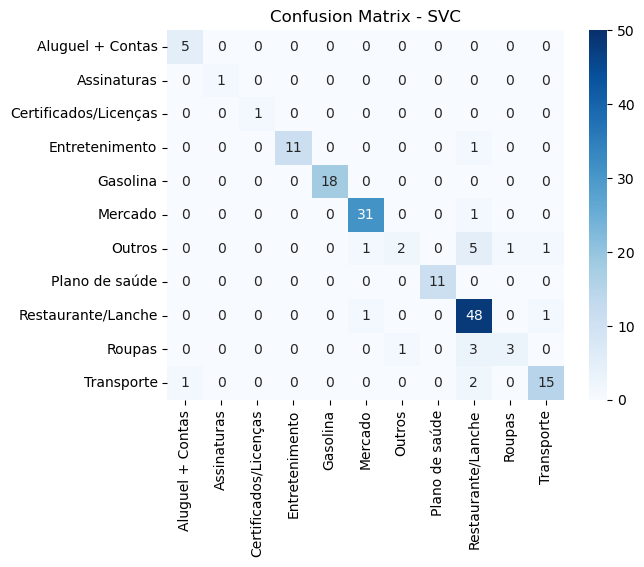

In [238]:
SVC_GS_predictions = SVC_gridsearch.best_estimator_.predict(X_test)
print(classification_report(y_test, SVC_GS_predictions))
cm = confusion_matrix(y_test, SVC_GS_predictions)
sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), vmax=50,
                xticklabels=oe_target.categories_[0], yticklabels=oe_target.categories_[0])
plt.title("Confusion Matrix - SVC")
plt.show()

              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80         5
         1.0       1.00      1.00      1.00         1
         2.0       1.00      1.00      1.00         1
         3.0       0.85      0.92      0.88        12
         4.0       0.86      1.00      0.92        18
         5.0       0.84      0.97      0.90        32
         6.0       0.33      0.20      0.25        10
         7.0       1.00      1.00      1.00        11
         8.0       0.90      0.86      0.88        50
         9.0       0.67      0.57      0.62         7
        10.0       0.94      0.83      0.88        18

    accuracy                           0.85       165
   macro avg       0.83      0.83      0.83       165
weighted avg       0.84      0.85      0.85       165



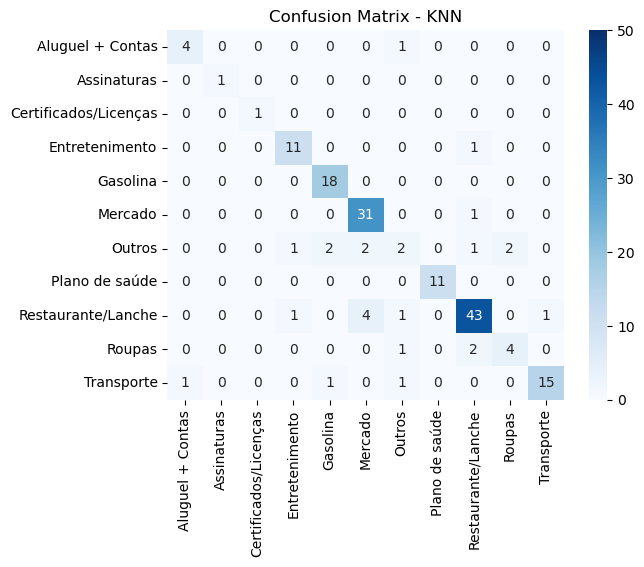

In [239]:
KNN_GS_predictions = KNN_gridsearch.best_estimator_.predict(X_test)
print(classification_report(y_test, KNN_GS_predictions))
cm = confusion_matrix(y_test, KNN_GS_predictions)
sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), vmax=50,
                xticklabels=oe_target.categories_[0], yticklabels=oe_target.categories_[0])
plt.title("Confusion Matrix - KNN")
plt.show()

              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      1.00      1.00         1
         2.0       1.00      1.00      1.00         1
         3.0       1.00      0.92      0.96        12
         4.0       0.94      0.94      0.94        18
         5.0       0.94      0.94      0.94        32
         6.0       0.50      0.10      0.17        10
         7.0       1.00      1.00      1.00        11
         8.0       0.77      0.96      0.86        50
         9.0       0.75      0.43      0.55         7
        10.0       0.88      0.83      0.86        18

    accuracy                           0.87       165
   macro avg       0.87      0.83      0.83       165
weighted avg       0.85      0.87      0.85       165



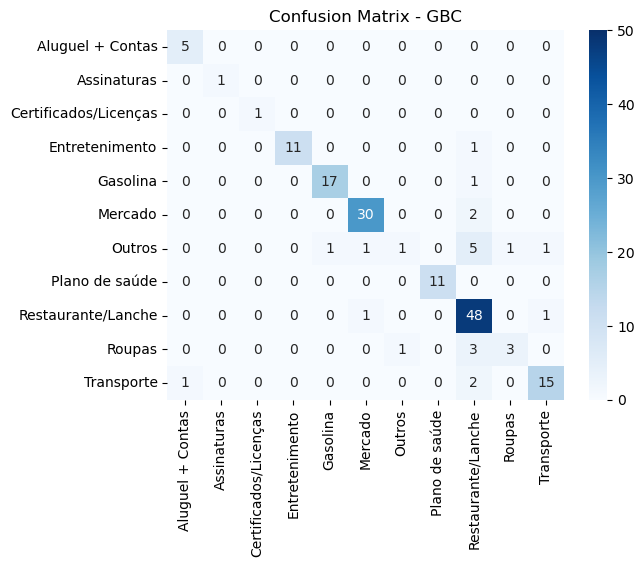

In [240]:
GBC_GS_predictions = new_gbc_gridsearch.best_estimator_.predict(X_test)
print(classification_report(y_test, GBC_GS_predictions))
cm = confusion_matrix(y_test, GBC_GS_predictions)
sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), vmax=50,
                xticklabels=oe_target.categories_[0], yticklabels=oe_target.categories_[0])
plt.title("Confusion Matrix - GBC")
plt.show()

Chosen model: SVC

In [241]:
df_jabiru

,Data,E/S,O quê?,Variável,Cidade,Quem pagou/recebeu?,Como pagou/recebeu?,Valor
26,2022-07-18,S,Loja de conveniência Posto Puma,NaN,Jabiru,Bruno,Wise,35.08
27,2022-07-19,S,Jabiru Foodland,NaN,Jabiru,Bruno,Wise,44.43
28,2022-07-21,S,Jabiru Foodland,NaN,Jabiru,Bruno,Wise,17.25
31,2022-07-23,S,Recepção do Croc,NaN,Jabiru,Bruno,Wise,5.25
32,2022-07-24,S,Café Marrawuddi,NaN,Jabiru,Bia,Wise,10.00
33,2022-07-25,S,Jabiru Foodland,NaN,Jabiru,Bia,Wise,65.89
34,2022-07-27,S,Bupa,NaN,Jabiru,Bruno,NAB,76.08
35,2022-07-27,S,Bupa,NaN,Jabiru,Bia,NAB,76.08
36,2022-07-28,S,Jabiru Foodland,NaN,Jabiru,Bia,Wise,13.92
37,2022-07-29,S,Recepção do Croc,NaN,Jabiru,Bia,Wise,4.10


In [291]:
X_jabiru = df_jabiru.copy()

X_jabiru['day_of_week'] = X_jabiru['Data'].dt.dayofweek
X_jabiru['weekday'] = np.where(X_jabiru['day_of_week'] < 5, 1, 0)

X_jabiru = X_jabiru[(X_jabiru['O quê?'] != 'Saque') & (X_jabiru['O quê?'] != 'Transferência')] 

X_jabiru.drop(drop_columns, axis=1, inplace=True)
X_jabiru.drop('Variável', axis=1, inplace=True)

In [292]:
SVC_result = SVC_gridsearch.best_estimator_.predict(X_jabiru)
SVC_result = oe_target.inverse_transform(SVC_result.reshape(-1, 1))

In [293]:
KNN_result = KNN_gridsearch.best_estimator_.predict(X_jabiru)
KNN_result = oe_target.inverse_transform(KNN_result.reshape(-1, 1))

In [294]:
GBC_result = new_gbc_gridsearch.best_estimator_.predict(X_jabiru)
GBC_result = oe_target.inverse_transform(GBC_result.reshape(-1, 1))

In [295]:
X_jabiru.reset_index(inplace=True)

In [296]:
X_jabiru['SVC'] = pd.DataFrame(SVC_result)
X_jabiru['KNN'] = pd.DataFrame(KNN_result)
X_jabiru['GBC'] = pd.DataFrame(GBC_result)

In [297]:
X_jabiru[(X_jabiru.KNN != X_jabiru.SVC)]

,index,O quê?,Quem pagou/recebeu?,Como pagou/recebeu?,Valor,day_of_week,weekday,SVC,KNN,GBC
0,26,Loja de conveniência Posto Puma,Bruno,Wise,35.08,0,1,Certificados/Licenças,Gasolina,Restaurante/Lanche
9,37,Recepção do Croc,Bia,Wise,4.10,4,1,Entretenimento,Outros,Outros
10,38,Recepção do Croc,Bia,Wise,3.50,6,0,Entretenimento,Outros,Outros
14,44,Anbinik,Bruno,Wise,61.00,6,0,Restaurante/Lanche,Mercado,Restaurante/Lanche
15,45,Loja de conveniência Posto Puma,Bia,Wise,10.65,6,0,Outros,Transporte,Restaurante/Lanche
17,47,Bebida Cooinda,Bia,Wise,10.50,6,0,Restaurante/Lanche,Transporte,Restaurante/Lanche
18,48,Jabiru Foodland,Bruno,Wise,90.03,0,1,Mercado,Outros,Mercado
34,74,Anbinik,Bruno,Wise,59.00,6,0,Restaurante/Lanche,Mercado,Restaurante/Lanche
35,75,Loja de conveniência Posto Puma,Bia,NAB,6.50,6,0,Outros,Mercado,Restaurante/Lanche
41,86,Ônibus para Darwin,Bia,Wise,55.55,5,0,Restaurante/Lanche,Transporte,Restaurante/Lanche


In [298]:
X_jabiru.set_index('index', inplace=True)

In [319]:
df_jabiru

,Data,E/S,O quê?,Variável,Cidade,Quem pagou/recebeu?,Como pagou/recebeu?,Valor
26,2022-07-18,S,Loja de conveniência Posto Puma,NaN,Jabiru,Bruno,Wise,35.08
27,2022-07-19,S,Jabiru Foodland,NaN,Jabiru,Bruno,Wise,44.43
28,2022-07-21,S,Jabiru Foodland,NaN,Jabiru,Bruno,Wise,17.25
31,2022-07-23,S,Recepção do Croc,NaN,Jabiru,Bruno,Wise,5.25
32,2022-07-24,S,Café Marrawuddi,NaN,Jabiru,Bia,Wise,10.00
33,2022-07-25,S,Jabiru Foodland,NaN,Jabiru,Bia,Wise,65.89
34,2022-07-27,S,Bupa,NaN,Jabiru,Bruno,NAB,76.08
35,2022-07-27,S,Bupa,NaN,Jabiru,Bia,NAB,76.08
36,2022-07-28,S,Jabiru Foodland,NaN,Jabiru,Bia,Wise,13.92
37,2022-07-29,S,Recepção do Croc,NaN,Jabiru,Bia,Wise,4.10


In [316]:
teste = X_jabiru[['SVC']]
teste.index.name = None

In [328]:
final_result = df_jabiru.join(teste, how='left')

In [330]:
final_result.drop('Variável', axis=1, inplace=True)
final_result.rename({'SVC':'Variável'}, axis=1, inplace=True)

In [335]:
final_result_name = 'Results_' + file_name
final_result.to_excel(os.path.join(path, final_result_name), index=False)

In [ ]:
pipeline.fit(X_train, y_train)

In [ ]:
predictions = pipeline.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, predictions)

In [ ]:
sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix")

print("Micro Recall:", recall_score(y_test, predictions, average='micro'))
print("Macro Recall:", recall_score(y_test, predictions, average='macro'))

In [ ]:
pipeline

Features to be added: day of the week, week day or weekend<br>
Columns to be dropped: ['E/S', 'O quê?', 'Data']<br>
Categorical columns: ['Variável', 'Cidade', 'Quem pagou/recebeu?', 'Como pagou/recebeu?']<br>
Column with labels to be predicted: 'Variável'

In [ ]:
df_expenses['day_of_week'] = df_expenses['Data'].dt.dayofweek

In [ ]:
df_expenses['weekday'] = np.where(df_expenses['day_of_week'] < 5, 1, 0)

In [ ]:
drop_columns = ['E/S', 'O quê?', 'Data']

df_expenses.drop( drop_columns, axis=1, inplace=True)

In [ ]:
#Ordinal Encoder: 
oe_columns = ['Cidade', 'Quem pagou/recebeu?', 'Como pagou/recebeu?', 'Variável']

In [ ]:
df_expenses_cat = df_expenses[oe_columns]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df_expenses_cat = ordinal_encoder.fit_transform(df_expenses_cat[oe_columns])

In [ ]:
ordinal_encoder.categories_

In [ ]:
from sklearn.preprocessing import StandardScaler

num_columns = ['Valor']

scaler = StandardScaler()
df_expenses_num = scaler.fit_transform(df_expenses[num_columns])

In [ ]:
df_expenses_num.shape, df_expenses_cat.shape

In [ ]:
df_expenses_1 = pd.DataFrame(df_expenses_cat, columns=[oe_columns])

In [ ]:
df_expenses_2 = pd.DataFrame(df_expenses_num, columns=[num_columns])

In [ ]:
df_expenses_prepared = pd.concat([df_expenses_1, df_expenses_2], axis=1)
df_expenses_prepared.drop('Variável', axis=1, inplace=True)

df_expenses_target = df_expenses_1['Variável']

In [ ]:
pipeline

In [ ]:
test_set

In [ ]:
df_test = test_set.copy()

df_test['day_of_week'] = df_test['Data'].dt.dayofweek
df_test['weekday'] = np.where(df_test['day_of_week'] < 5, 1, 0)
df_test.drop(drop_columns, axis=1, inplace=True)

df_test_cat = ordinal_encoder.transform(df_test[oe_columns])
df_test_num = scaler.transform(df_test[num_columns])

df_test_1 = pd.DataFrame(df_test_cat, columns=[oe_columns])
df_test_2 = pd.DataFrame(df_test_num, columns=[num_columns])

df_test_prepared = pd.concat([df_test_1, df_test_2], axis=1)
df_test_prepared.drop('Variável', axis=1, inplace=True)

df_test_target = df_test_1['Variável']

In [ ]:
df_test_prepared

In [ ]:
df_test_target

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

dtree_model = DecisionTreeClassifier(max_depth = 10).fit(df_expenses_prepared, df_expenses_target)

In [ ]:
dtree_predictions = dtree_model.predict(df_test_prepared)

In [ ]:
cm = confusion_matrix(df_test_target, dtree_predictions)

In [ ]:
sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix")

print("Micro Precision:", precision_score(df_test_target, dtree_predictions, average='micro'))
print("Micro Recall:", recall_score(df_test_target, dtree_predictions, average='micro'))

In [ ]:
from sklearn.metrics import precision_score, recall_score

macro_precision = precision_score(df_test_target, dtree_predictions, average='macro')
macro_recall = recall_score(df_test_target, dtree_predictions, average='macro')
micro_precision = precision_score(df_test_target, dtree_predictions, average='micro')
micro_recall = recall_score(df_test_target, dtree_predictions, average='micro')

print("Macro Precision:", macro_precision)
print("Macro Recall:", macro_recall)
print("Micro Precision:", micro_precision)
print("Micro Recall:", micro_recall)

In [ ]:
weighted_precision = precision_score(df_test_target, dtree_predictions, average='weighted')
weighted_recall = recall_score(df_test_target, dtree_predictions, average='weighted')

In [ ]:
print("Weighted Precision:", weighted_precision)
print("Weighted Recall:", weighted_recall)

In [ ]:
train_pred = dtree_model.predict(df_expenses_prepared)

cm = confusion_matrix(df_expenses_target, train_pred)

sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix")

micro_recall = recall_score(df_expenses_target, train_pred, average='micro')

print("Micro Precision:", precision_score(df_expenses_target, train_pred, average='micro'))
print("Micro Recall:", recall_score(df_expenses_target, train_pred, average='micro'))

In [ ]:
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'rbf', C = 5).fit(df_expenses_prepared, df_expenses_target)
svm_predictions = svm_model_linear.predict(df_test_prepared)

# model accuracy for X_test  
accuracy = svm_model_linear.score(df_test_prepared, df_test_target)
print ('Accuracy: ', accuracy)

# creating a confusion matrix
cm = confusion_matrix(df_test_target, svm_predictions)
sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix - Test set")

print("Micro Precision:", precision_score(df_test_target, svm_predictions, average='micro'))
print("Micro Recall:", recall_score(df_test_target, svm_predictions, average='micro'))

In [ ]:
train_pred = svm_model_linear.predict(df_expenses_prepared)

cm = confusion_matrix(df_expenses_target, train_pred)

sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix - Train set")

micro_recall = recall_score(df_expenses_target, train_pred, average='micro')

print("Micro Precision:", precision_score(df_expenses_target, train_pred, average='micro'))
print("Micro Recall:", recall_score(df_expenses_target, train_pred, average='micro'))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5).fit(df_expenses_prepared, df_expenses_target)

# accuracy on X_test
accuracy = knn.score(df_test_prepared, df_test_target)
print ('Accuracy: ', accuracy)

knn_predictions = knn.predict(df_test_prepared) 

# creating a confusion matrix
cm = confusion_matrix(df_test_target, knn_predictions)
sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix - Test set")

print("Micro Precision:", precision_score(df_test_target, knn_predictions, average='micro'))
print("Micro Recall:", recall_score(df_test_target, knn_predictions, average='micro'))

In [ ]:
train_pred = knn.predict(df_expenses_prepared)

cm = confusion_matrix(df_expenses_target, train_pred)

sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix - Train set")

micro_recall = recall_score(df_expenses_target, train_pred, average='micro')

print("Micro Precision:", precision_score(df_expenses_target, train_pred, average='micro'))
print("Micro Recall:", recall_score(df_expenses_target, train_pred, average='micro'))

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C=1, solver='lbfgs', multi_class='multinomial', max_iter=10000).fit(df_expenses_prepared, df_expenses_target)

# accuracy on X_test
accuracy = log_reg.score(df_test_prepared, df_test_target)
print ('Accuracy: ', accuracy)

log_reg_predictions = log_reg.predict(df_test_prepared) 

# creating a confusion matrix
cm = confusion_matrix(df_test_target, log_reg_predictions)
sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix - Test set")

print("Micro Precision:", precision_score(df_test_target, log_reg_predictions, average='micro'))
print("Micro Recall:", recall_score(df_test_target, log_reg_predictions, average='micro'))

In [ ]:
train_pred = log_reg.predict(df_expenses_prepared)

cm = confusion_matrix(df_expenses_target, train_pred)

sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix - Train set")

micro_recall = recall_score(df_expenses_target, train_pred, average='micro')

print("Micro Precision:", precision_score(df_expenses_target, train_pred, average='micro'))
print("Micro Recall:", recall_score(df_expenses_target, train_pred, average='micro'))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=0).fit(df_expenses_prepared, df_expenses_target)

# accuracy on X_test
accuracy = random_forest.score(df_test_prepared, df_test_target)
print ('Accuracy: ', accuracy)

random_forest_predictions = random_forest.predict(df_test_prepared) 

# creating a confusion matrix
cm = confusion_matrix(df_test_target, random_forest_predictions)
sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix - Test set")

print("Micro Precision:", precision_score(df_test_target, random_forest_predictions, average='micro'))
print("Micro Recall:", recall_score(df_test_target, random_forest_predictions, average='micro'))

In [ ]:
train_pred = random_forest.predict(df_expenses_prepared)

cm = confusion_matrix(df_expenses_target, train_pred)

sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix - Train set")

micro_recall = recall_score(df_expenses_target, train_pred, average='micro')

print("Micro Precision:", precision_score(df_expenses_target, train_pred, average='micro'))
print("Micro Recall:", recall_score(df_expenses_target, train_pred, average='micro'))

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

kernel = 1.0 * RBF(1.0)

gpc = GaussianProcessClassifier(kernel=kernel, random_state=0, multi_class='one_vs_rest').fit(df_expenses_prepared, df_expenses_target)

# accuracy on X_test
accuracy = gpc.score(df_test_prepared, df_test_target)
print ('Accuracy: ', accuracy)

gpc_predictions = gpc.predict(df_test_prepared) 

# creating a confusion matrix
cm = confusion_matrix(df_test_target, gpc_predictions)
sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix - Test set")

print("Micro Precision:", precision_score(df_test_target, gpc_predictions, average='micro'))
print("Micro Recall:", recall_score(df_test_target, gpc_predictions, average='micro'))

In [ ]:
train_pred = gpc.predict(df_expenses_prepared)

cm = confusion_matrix(df_expenses_target, train_pred)

sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix - Train set")

micro_recall = recall_score(df_expenses_target, train_pred, average='micro')

print("Micro Precision:", precision_score(df_expenses_target, train_pred, average='micro'))
print("Micro Recall:", recall_score(df_expenses_target, train_pred, average='micro'))

In [ ]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier('squared_hinge', max_iter=10000, tol=0.00001).fit(df_expenses_prepared, df_expenses_target)

# accuracy on X_test
accuracy = sgdc.score(df_test_prepared, df_test_target)
print ('Accuracy: ', accuracy)

sgdc_predictions = sgdc.predict(df_test_prepared) 

# creating a confusion matrix
cm = confusion_matrix(df_test_target, sgdc_predictions)
sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix - Test set")

print("Micro Precision:", precision_score(df_test_target, sgdc_predictions, average='micro'))
print("Micro Recall:", recall_score(df_test_target, sgdc_predictions, average='micro'))

In [ ]:
train_pred = sgdc.predict(df_expenses_prepared)

cm = confusion_matrix(df_expenses_target, train_pred)

sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix - Train set")

micro_recall = recall_score(df_expenses_target, train_pred, average='micro')

print("Micro Precision:", precision_score(df_expenses_target, train_pred, average='micro'))
print("Micro Recall:", recall_score(df_expenses_target, train_pred, average='micro'))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, max_depth=3, 
                                 random_state=0).fit(df_expenses_prepared, df_expenses_target)

# accuracy on X_test
accuracy = gbc.score(df_test_prepared, df_test_target)
print ('Accuracy: ', accuracy)

gbc_predictions = gbc.predict(df_test_prepared) 

# creating a confusion matrix
cm = confusion_matrix(df_test_target, gbc_predictions)
sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix - Test set")

print("Micro Precision:", precision_score(df_test_target, gbc_predictions, average='micro'))
print("Micro Recall:", recall_score(df_test_target, gbc_predictions, average='micro'))

In [ ]:
train_pred = gbc.predict(df_expenses_prepared)

cm = confusion_matrix(df_expenses_target, train_pred)

sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix - Train set")

micro_recall = recall_score(df_expenses_target, train_pred, average='micro')

print("Micro Precision:", precision_score(df_expenses_target, train_pred, average='micro'))
print("Micro Recall:", recall_score(df_expenses_target, train_pred, average='micro'))

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=1, max_iter=300, solver='lbfgs', activation='tanh').fit(df_expenses_prepared, df_expenses_target)

# accuracy on X_test
accuracy = mlp.score(df_test_prepared, df_test_target)
print ('Accuracy: ', accuracy)

mlp_predictions = mlp.predict(df_test_prepared) 

# creating a confusion matrix
cm = confusion_matrix(df_test_target, mlp_predictions)
sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix - Test set")

print("Micro Precision:", precision_score(df_test_target, mlp_predictions, average='micro'))
print("Micro Recall:", recall_score(df_test_target, mlp_predictions, average='micro'))

In [ ]:
train_pred = mlp.predict(df_expenses_prepared)

cm = confusion_matrix(df_expenses_target, train_pred)

sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix - Train set")

micro_recall = recall_score(df_expenses_target, train_pred, average='micro')

print("Micro Precision:", precision_score(df_expenses_target, train_pred, average='micro'))
print("Micro Recall:", recall_score(df_expenses_target, train_pred, average='micro'))

In [ ]:
from sklearn.naive_bayes import BernoulliNB

bernoulli = BernoulliNB().fit(df_expenses_prepared, df_expenses_target)

# accuracy on X_test
accuracy = bernoulli.score(df_test_prepared, df_test_target)
print ('Accuracy: ', accuracy)

bernoulli_predictions = bernoulli.predict(df_test_prepared) 

# creating a confusion matrix
cm = confusion_matrix(df_test_target, bernoulli_predictions)
sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix - Test set")

print("Micro Precision:", precision_score(df_test_target, bernoulli_predictions, average='micro'))
print("Micro Recall:", recall_score(df_test_target, bernoulli_predictions, average='micro'))

In [ ]:
train_pred = bernoulli.predict(df_expenses_prepared)

cm = confusion_matrix(df_expenses_target, train_pred)

sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix - Train set")

micro_recall = recall_score(df_expenses_target, train_pred, average='micro')

print("Micro Precision:", precision_score(df_expenses_target, train_pred, average='micro'))
print("Micro Recall:", recall_score(df_expenses_target, train_pred, average='micro'))

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto').fit(df_expenses_prepared, df_expenses_target)

# accuracy on X_test
accuracy = LDA.score(df_test_prepared, df_test_target)
print ('Accuracy: ', accuracy)

LDA_predictions = LDA.predict(df_test_prepared) 

# creating a confusion matrix
cm = confusion_matrix(df_test_target, LDA_predictions)
sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix - Test set")

print("Micro Precision:", precision_score(df_test_target, LDA_predictions, average='micro'))
print("Micro Recall:", recall_score(df_test_target, LDA_predictions, average='micro'))

In [ ]:
train_pred = LDA.predict(df_expenses_prepared)

cm = confusion_matrix(df_expenses_target, train_pred)

sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix - Train set")

micro_recall = recall_score(df_expenses_target, train_pred, average='micro')

print("Micro Precision:", precision_score(df_expenses_target, train_pred, average='micro'))
print("Micro Recall:", recall_score(df_expenses_target, train_pred, average='micro'))

In [ ]:
from sklearn.neighbors import NearestCentroid

centroid = NearestCentroid(metric='manhattan', shrink_threshold=2).fit(df_expenses_prepared, df_expenses_target)

# accuracy on X_test
accuracy = centroid.score(df_test_prepared, df_test_target)
print ('Accuracy: ', accuracy)

centroid_predictions = centroid.predict(df_test_prepared) 

# creating a confusion matrix
cm = confusion_matrix(df_test_target, centroid_predictions)
sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix - Test set")

print("Micro Precision:", precision_score(df_test_target, centroid_predictions, average='micro'))
print("Micro Recall:", recall_score(df_test_target, centroid_predictions, average='micro'))

In [ ]:
train_pred = centroid.predict(df_expenses_prepared)

cm = confusion_matrix(df_expenses_target, train_pred)

sns.heatmap(cm, annot =True, fmt="d",cmap=plt.get_cmap('Blues'), xticklabels=ordinal_encoder.categories_[3], yticklabels=ordinal_encoder.categories_[3])
plt.title("Confusion Matrix - Train set")

micro_recall = recall_score(df_expenses_target, train_pred, average='micro')

print("Micro Precision:", precision_score(df_expenses_target, train_pred, average='micro'))
print("Micro Recall:", recall_score(df_expenses_target, train_pred, average='micro'))

In [ ]:
model_list = []